<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/Homework_Week5_FuzzyLogic/blob/main/Patients_Management_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ef45ef6a2eeb12f8ebb51044ac7aea9fb79c2109828463ef1b9f60cce02a427c
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


20.000000000000316


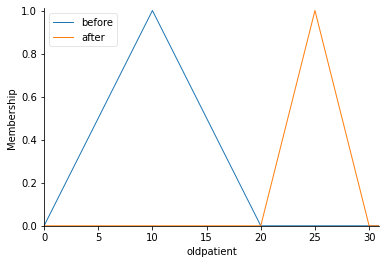

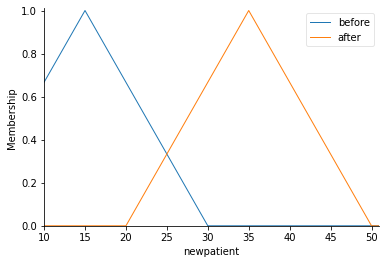

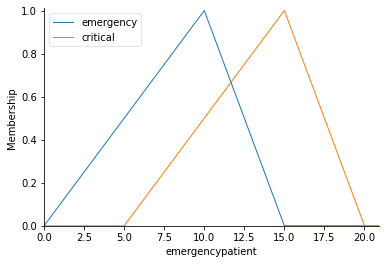

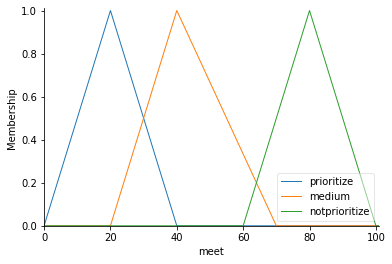

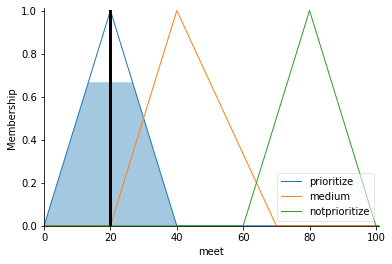

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

oldpatient=ctrl.Antecedent(np.arange(0,31,0.1),'oldpatient')
newpatient=ctrl.Antecedent(np.arange(10,51,0.1),'newpatient')
emergencypatient=ctrl.Antecedent(np.arange(0,21,0.1),'emergencypatient')
meet=ctrl.Consequent(np.arange(0,101,0.1),'meet')

oldpatient['before']=fuzz.trimf(oldpatient.universe,[0,10,20])
oldpatient['after']=fuzz.trimf(oldpatient.universe,[20,25,30])

newpatient['before']=fuzz.trimf(newpatient.universe,[0,15,30])
newpatient['after']=fuzz.trimf(newpatient.universe,[20,35,50])

emergencypatient['emergency']=fuzz.trimf(emergencypatient.universe,[0,10,15])
emergencypatient['critical']=fuzz.trimf(emergencypatient.universe,[5,15,20])

meet['prioritize']=fuzz.trimf(meet.universe,[0,20,40])
meet['medium']=fuzz.trimf(meet.universe,[20,40,70])
meet['notprioritize']=fuzz.trimf(meet.universe,[60,80,100])

oldpatient.view()
newpatient.view()
emergencypatient.view()
meet.view()

rule1=ctrl.Rule(oldpatient['before']&newpatient['before']&emergencypatient['emergency'],meet['notprioritize'])
rule2=ctrl.Rule(oldpatient['before']&newpatient['after']&emergencypatient['emergency'],meet['notprioritize'])
rule3=ctrl.Rule(oldpatient['before']&newpatient['before']&emergencypatient['emergency'],meet['medium'])
rule4=ctrl.Rule(oldpatient['before']&newpatient['after']&emergencypatient['emergency'],meet['prioritize'])

rule5=ctrl.Rule(oldpatient['after']&newpatient['before']&emergencypatient['critical'],meet['medium'])
rule6=ctrl.Rule(oldpatient['after']&newpatient['after']&emergencypatient['critical'],meet['prioritize'])
rule7=ctrl.Rule(oldpatient['after']&newpatient['before']&emergencypatient['critical'],meet['prioritize'])
rule8=ctrl.Rule(oldpatient['after']&newpatient['after']&emergencypatient['critical'],meet['prioritize'])

meeting_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
meeting=ctrl.ControlSystemSimulation(meeting_ctrl)
meeting.input['oldpatient']= 25
meeting.input['newpatient']= 30
meeting.input['emergencypatient']= 15
meeting.compute()
print(meeting.output['meet'])
meet.view(sim=meeting)




